In [1]:
# =============================================================================
# # 1. SETUP: IMPORTING LIBRARIES
# =============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [3]:
# =============================================================================
# # 2. DATA LOADING AND BASELINE MODEL (Same as before)
# =============================================================================
df_base_raw = pd.read_csv('data/train.csv')

def clean_data(data):
    data['Age'].fillna(data['Age'].median(), inplace=True)
    data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
    data['Fare'].fillna(data['Fare'].median(), inplace=True)
    return data

df_base_clean = clean_data(df_base_raw)
baseline_features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
target = 'Survived'
df_baseline_encoded = pd.get_dummies(df_base_clean[baseline_features + [target]], columns=['Sex', 'Embarked'], drop_first=True)
X_base = df_baseline_encoded.drop(target, axis=1)
y_base = df_baseline_encoded[target]
X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(X_base, y_base, test_size=0.3, random_state=42)
baseline_model = RandomForestClassifier(n_estimators=100, random_state=42)
baseline_model.fit(X_train_base, y_train_base)
y_pred_base = baseline_model.predict(X_test_base)
baseline_accuracy = accuracy_score(y_test_base, y_pred_base)

print(f"Baseline Accuracy: {baseline_accuracy:.4f}")
print("\n" + "="*50 + "\n")


Baseline Accuracy: 0.7799




C:\Users\RIYA\AppData\Local\Temp\ipykernel_11748\3122893992.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
C:\Users\RIYA\AppData\Local\Temp\ipykernel_11748\3122893992.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [5]:
# =============================================================================
# # 3. ADVANCED FEATURE ENGINEERING
# =============================================================================
df_fe_raw = pd.read_csv('data/train.csv')
df_fe = clean_data(df_fe_raw)

# --- Feature 1: Advanced Title Grouping ---
title_mapping = {"Mr": "Mr", "Miss": "Miss", "Mrs": "Mrs", "Master": "Master", "Dr": "Official", "Rev": "Official", "Col": "Official", "Major": "Official", "Capt": "Official", "Mlle": "Miss", "Ms": "Miss", "Mme": "Mrs", "Lady": "Royal", "Countess": "Royal", "Jonkheer": "Royal", "Sir": "Royal", "Don": "Royal"}
df_fe['Title'] = df_fe['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df_fe['Title'] = df_fe['Title'].map(title_mapping).fillna('Other')

# --- Feature 2: Binning Age and Fare ---
df_fe['AgeBin'] = pd.cut(df_fe['Age'], bins=[0, 12, 18, 35, 60, 100], labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])
df_fe['FareBin'] = pd.qcut(df_fe['Fare'], 4, labels=['Low', 'Medium', 'High', 'Very High'])

# --- Feature 3: Extracting Deck from Cabin ---
df_fe['Deck'] = df_fe['Cabin'].str[0].fillna('U')

print("--- Advanced Features Created ---")
print(df_fe[['Title', 'AgeBin', 'FareBin', 'Deck']].head())
print("\n" + "="*50 + "\n")




--- Advanced Features Created ---
  Title       AgeBin    FareBin Deck
0    Mr  Young Adult        Low    U
1   Mrs        Adult  Very High    C
2  Miss  Young Adult     Medium    U
3   Mrs  Young Adult  Very High    C
4    Mr  Young Adult     Medium    U




<>:9: SyntaxWarning: invalid escape sequence '\.'
<>:9: SyntaxWarning: invalid escape sequence '\.'
C:\Users\RIYA\AppData\Local\Temp\ipykernel_11748\1588304459.py:9: SyntaxWarning: invalid escape sequence '\.'
  df_fe['Title'] = df_fe['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
C:\Users\RIYA\AppData\Local\Temp\ipykernel_11748\3122893992.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
C:\Users\RIYA\AppData\Local\Temp\ipykernel_11748\3122893992.py:8: FutureWarnin

In [6]:
# =============================================================================
# # 4. MODEL WITH ADVANCED FEATURES
# =============================================================================
# Select features, dropping the original columns we replaced
features_to_drop = ['Name', 'Ticket', 'Cabin', 'Age', 'Fare', 'SibSp', 'Parch']
df_fe.drop(features_to_drop, axis=1, inplace=True)

# One-hot encode all categorical features
df_fe_encoded = pd.get_dummies(df_fe, columns=['Sex', 'Embarked', 'Title', 'AgeBin', 'FareBin', 'Deck'], drop_first=True)

X_fe = df_fe_encoded.drop(target, axis=1)
y_fe = df_fe_encoded[target]

# Split and train the new model
X_train_fe, X_test_fe, y_train_fe, y_test_fe = train_test_split(X_fe, y_fe, test_size=0.3, random_state=42)
fe_model = RandomForestClassifier(n_estimators=100, random_state=42)
fe_model.fit(X_train_fe, y_train_fe)
y_pred_fe = fe_model.predict(X_test_fe)
fe_accuracy_advanced = accuracy_score(y_test_fe, y_pred_fe)

print(f"Accuracy with Advanced Features: {fe_accuracy_advanced:.4f}")
print("\n" + "="*50 + "\n")

Accuracy with Advanced Features: 0.7985




The new features resulted in a 2.39% relative improvement in accuracy.


C:\Users\RIYA\AppData\Local\Temp\ipykernel_11748\763506168.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=accuracies, palette='viridis')


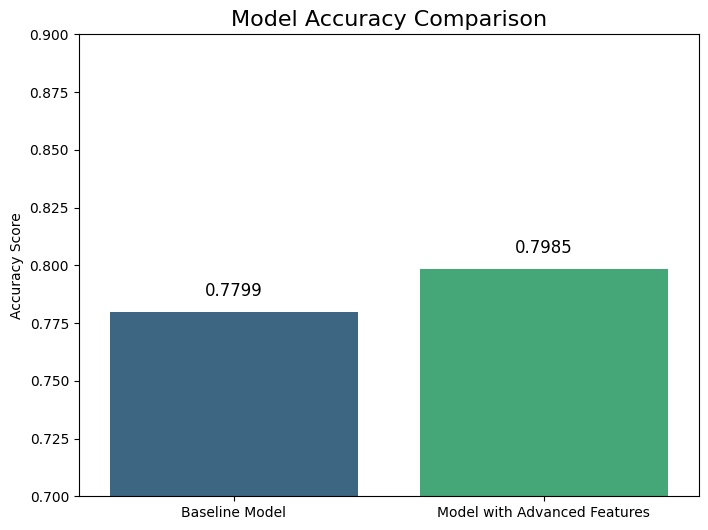

In [7]:
# =============================================================================
# # 5. VISUALIZE THE IMPROVEMENT
# =============================================================================
improvement = ((fe_accuracy_advanced - baseline_accuracy) / baseline_accuracy) * 100
print(f"The new features resulted in a {improvement:.2f}% relative improvement in accuracy.")

plt.figure(figsize=(8, 6))
accuracies = [baseline_accuracy, fe_accuracy_advanced]
labels = ['Baseline Model', 'Model with Advanced Features']
sns.barplot(x=labels, y=accuracies, palette='viridis')
plt.ylabel('Accuracy Score')
plt.title('Model Accuracy Comparison', fontsize=16)
plt.ylim(0.7, 0.9)
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.005, f'{acc:.4f}', ha='center', va='bottom', fontsize=12)
plt.savefig('model_improvement_chart_advanced.png')
plt.show()